# Finding Playoff Athletes

Finding “steal” players cannot be determined based on any one stat.  For example, the performance value of a particular player may increase due to spending more time on the court, allowing them to score more points.  This value could also be found in their yearly salary, where better or more seasoned players tend to earn more money than those with less skill and experience.  To find which players would be good choices to recruit, I considered their current salary, total points scored and minutes played because these stats ultimately determine the level to which a player is recognized for their skill.  I also took total rebounds and assists into account, which indicate a player’s skill beyond simply scoring points.  Taking these variables into account will allow for finding the most desirable players who have the stats of a superstar player but cost the team much less than a recognized superstar player earns.  Therefore, this model highlights mismatches in high salary and high performance so we can be aware of overlooked high-performing players, which will be a cheaper option than recruiting a high-performing, high-earning player. 

As I considered all these criteria, I made sure that no one feature of a player overpowered another, such as a smaller salary that may distract from their actual proven skill.  I did this by using a StandardScaler, which ensures that each feature is evaluated on the same scale and bias towards a particular feature could be eliminated.  This allows for a more holistic evaluation of a particular player, looking for standouts otherwise hidden by a lesser salary. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
# This code sets up the data for visualization. This is from the notebook with the model in it.
salary_data = pd.read_csv('2025_salaries.csv', header = 1, encoding = 'latin-1')
stats = pd.read_csv('nba_2025.txt', sep = ',', encoding = 'latin-1')

In [6]:
# This code sets up the data for visualization. This is from the notebook with the model in it.
merged_data = pd.merge(salary_data, stats, on = 'Player')
merged_data = merged_data.drop([
    'Pos', 
    'Age', 
    'Team', 
    'Tm', 
    'Rk', 
    'Awards', 
    'Player-additional'
    ], axis = 1)

duplicates = merged_data[merged_data.duplicated(subset = 'Player', keep = False)]

merged_data = merged_data.drop_duplicates()

merged_data['2025-26'] = merged_data['2025-26'].replace('[\$, ]', '', regex = True)
merged_data['2025-26'] = merged_data['2025-26'].astype(float)

clustering = merged_data.dropna(subset = ['2025-26'])
clustering = clustering.fillna(0)

X = clustering.drop(columns = ['Player'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

features = ['2025-26', 'PTS', 'MP', 'TRB', 'AST']
X = clustering[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans4 = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

clustering['Tier'] = kmeans4.fit_predict(X_scaled)

tier_map = clustering.groupby('Tier')['2025-26'].mean().sort_values(ascending = False).index
tier_labels = {
    tier_map[0]: 'Superstars', 
    tier_map[1]: 'Starters',
    tier_map[2]: 'Rotation',
    tier_map[3]: 'Bench/Rookies'
    }

clustering['Tier_Name'] = clustering['Tier'].map(tier_labels)

<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_101696/2913120106.py:17: SyntaxWarning: invalid escape sequence '\$'
  merged_data['2025-26'] = merged_data['2025-26'].replace('[\$, ]', '', regex = True)


This scatterplot below displays all of the possible choices to recruit to join the team and impact the odds of a playoff appearance.  Specifically, the points that should receive the most attention are those with the stats of a superstar but are playing in backup positions or sitting on the bench this season.  These points, each representing a player, indicate the exact kind of player that is most desirable in this situation: higher performance value for less yearly cost.  By saving this money, the team can afford to recruit more of these overlooked standout players and build a stronger lineup.  To identify these players, look at the points on the plot that are either purple or blue, but are scoring comparable amounts of points to the teal and grean points.

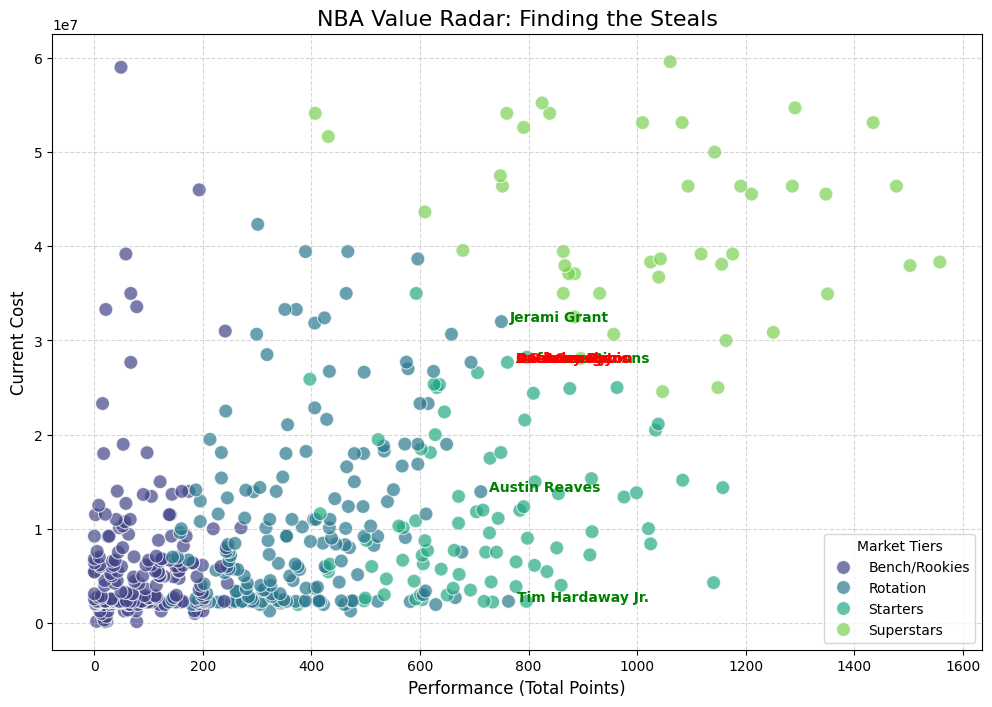

In [7]:
plt.figure(figsize = (12, 8))

# I included the Tier Name in the legend for easy distinguisment between groups.
sns.scatterplot(data = clustering, x = 'PTS', y = '2025-26',
                hue = 'Tier_Name', palette = 'viridis', s = 100,
                alpha = 0.7)

# Singling out good choices by labeling their points with player names
targets = ['Tim Hardaway Jr.', 'Jerami Grant', 'Austin Reaves', 'Anfernee Simons']
for name in targets:
    player = clustering[clustering['Player'] == name]
    if not player.empty:
        plt.text(player['PTS'].values[0]+15, player['2025-26'].values[0],
                 name, fontsize = 10, weight = 'bold', color = 'green')

traps = ['Anthony Davis', 'Paul George', 'Deandre Ayton', 'OG Anunoby']

# Recognizing names in the list of the 4 worst choices and labeling their points with their names
for name in traps:
    if not player.empty:
        plt.text(player['PTS'].values[0]+15, player['2025-26'].values[0],
                 name, fontsize = 10, weight = 'bold', color = 'red')

# creation of the plot through labelling
plt.title('NBA Value Radar: Finding the Steals', fontsize = 16)
plt.xlabel('Performance (Total Points)', fontsize = 12)
plt.ylabel('Current Cost', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend(title = 'Market Tiers')
plt.show()

 
After running my model based on the players’ stats, I found four players that could be the best choice to recruit: Tim Hardaway Jr., Jerami Grant, Austin Reaves, and Anfernee Simons.  They are all classified as rotation-level players, requiring much less financial compensation than superstar players with multimillion-dollar salaries.  However, these athletes are scoring the same number of points as higher-earning starter players.  Some bad choices to recruit are generally more expensive to support and are providing the least amount of actual production to their teams during the current season.  These players are Anthony Davis, Paul George, Deandre Ayton, and OG Anunoby.  Despite their recognition as respected and skilled players in the NBA, their lackluster performance compared to other superstars is not worth their expensive price tag compared to the rotation players that are scoring more points.  